# 2021 Introduction to Machine Learning Final Project
## Topic : kinase compound inhibitors預測（RAF1）
**系級：生物科技學系**
**學號：0717001**
**姓名：李柏毅**

# Package import


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import std
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Data input

In [2]:
df = pd.read_csv("/data/poyili/UnderG/0717001_ML_final/merged_features_me.csv", index_col = 0)
df

,maccs#0,maccs#1,maccs#2,maccs#3,maccs#4,maccs#5,maccs#6,maccs#7,maccs#8,maccs#9,...,ecfp#1014,ecfp#1015,ecfp#1016,ecfp#1017,ecfp#1018,ecfp#1019,ecfp#1020,ecfp#1021,ecfp#1022,ecfp#1023
SMILES,,,,,,,,,,,,,,,,,,,,,
CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(cc23)c4ccc(nc4)C(=O)NCC)c1F,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COC(=O)Nc1nc2cc(ccc2[nH]1)C3(O)N(C(=O)c4ccccc34)c5cccc(c5)C(=O)C,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CCC(=O)N1CCC(CC1)NC(=O)Nc2ccc(OC(F)(F)F)cc2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
COC(=O)Nc1nc2cc(ccc2[nH]1)C3(O)N(CC(C)(C)C)C(=O)c4ccccc34,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CN1CCCC(COC(=O)Nc2nc3ccc(cc3[nH]2)C4(O)N(C(=O)c5ccccc45)c6cccc(Cl)c6F)C1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN1CCC(CCOC(=O)Nc2nc3cc(ccc3[nH]2)C4(O)N(C(=O)c5ccccc45)c6cccc(Cl)c6F)CC1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CNc1cc(Oc2ccc(NC(=O)NC3CC3)c(C)c2)ncn1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
COc1cc(ccc1O)c2ccc3ncnc(Nc4ccccc4)c3c2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Label data input

In [5]:
df_label = pd.read_excel("/data/poyili/UnderG/model_test/20211202/RAF1.xlsx")
df_label

,SMILE,inchikey,MW,Group,Family,Gene_name,uniprot_id,chembl_id,source,label
0,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(cc23)...,AACPHNFEDMXRPQ-UHFFFAOYSA-N,527.55,TKL,RAF,RAF1,P04049,CHEMBL3928507,chembl,1
1,COC(=O)Nc1nc2cc(ccc2[nH]1)C3(O)N(C(=O)c4ccccc3...,AAINHBFUHPNAPW-UHFFFAOYSA-N,456.46,TKL,RAF,RAF1,P04049,CHEMBL3901924,chembl,1
2,CCC(=O)N1CCC(CC1)NC(=O)Nc2ccc(OC(F)(F)F)cc2,AAJMQTLFRTZCJK-UHFFFAOYSA-N,359.35,TKL,RAF,RAF1,P04049,CHEMBL1258904,chembl,0
3,COC(=O)Nc1nc2cc(ccc2[nH]1)C3(O)N(CC(C)(C)C)C(=...,ABOWVCATJOQIKV-UHFFFAOYSA-N,408.46,TKL,RAF,RAF1,P04049,CHEMBL3909114,chembl,0
4,CN1CCCC(COC(=O)Nc2nc3ccc(cc3[nH]2)C4(O)N(C(=O)...,ABUMCYWUNDSGMI-UHFFFAOYSA-N,564.02,TKL,RAF,RAF1,P04049,CHEMBL3959066,chembl,1
...,...,...,...,...,...,...,...,...,...,...
859,CN1CCC(CCOC(=O)Nc2nc3cc(ccc3[nH]2)C4(O)N(C(=O)...,ZWPDIIFUYHSQKJ-UHFFFAOYSA-N,578.04,TKL,RAF,RAF1,P04049,CHEMBL3971430,chembl,1
860,CNc1cc(Oc2ccc(NC(=O)NC3CC3)c(C)c2)ncn1,ZYFNWPFFZHEIEQ-UHFFFAOYSA-N,313.36,TKL,RAF,RAF1,P04049,CHEMBL4079740,chembl,0
861,COc1cc(ccc1O)c2ccc3ncnc(Nc4ccccc4)c3c2,ZYIVFBQMIVATBO-UHFFFAOYSA-N,343.39,TKL,RAF,RAF1,P04049,CHEMBL3661201,chembl,0
862,COc1cccc(c1)N2C(=O)c3ccccc3C2(O)c4ccc5OCC(=O)N...,ZYJMLXUONVRHHX-UHFFFAOYSA-N,402.41,TKL,RAF,RAF1,P04049,CHEMBL3908184,chembl,1


# Train Test Split(7:3)

In [6]:
X = df.iloc[:,:]
y = df_label.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
X_train

,maccs#0,maccs#1,maccs#2,maccs#3,maccs#4,maccs#5,maccs#6,maccs#7,maccs#8,maccs#9,...,ecfp#1014,ecfp#1015,ecfp#1016,ecfp#1017,ecfp#1018,ecfp#1019,ecfp#1020,ecfp#1021,ecfp#1022,ecfp#1023
SMILES,,,,,,,,,,,,,,,,,,,,,
CCC(=O)Nc1nc2ccc(cc2[nH]1)C3(O)N(C(=O)c4ccccc34)c5ccc(F)cc5,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brc1cnc2NC(=O)\C(=C/c3cccc(Oc4ccccc4)c3)\c2c1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cc1ccc(cc1c2ccc3c(NC(=O)C34CCCC4)c2)C(=O)NC5CC5,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(cc23)c4ccc(nc4)C(=O)N)c1F,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CNC(=O)c1cc2ccc(CCNC(=O)Nc3cc(ccc3F)C(F)(F)F)cc2cn1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COC(=O)Nc1nc2cc(ccc2[nH]1)C3(O)N(Cc4ccccc4Cl)C(=O)c5ccccc35,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COC(=O)Nc1nc2ccc(cc2[nH]1)C3(O)N(C(=O)c4cccc(F)c34)c5cccc(Cl)c5F,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COc1ccc(cc1C)c2ccc3ncnc(Nc4cccc5[nH]ncc45)c3c2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_test

,maccs#0,maccs#1,maccs#2,maccs#3,maccs#4,maccs#5,maccs#6,maccs#7,maccs#8,maccs#9,...,ecfp#1014,ecfp#1015,ecfp#1016,ecfp#1017,ecfp#1018,ecfp#1019,ecfp#1020,ecfp#1021,ecfp#1022,ecfp#1023
SMILES,,,,,,,,,,,,,,,,,,,,,
CN(C)C(=O)Oc1cc2OC(=O)C(=C(C)c2cc1Cl)Cc3cccc(NS(=O)(=O)N)c3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COc1ccc(cc1OC)c2ccc3nccc(Nc4cccc5[nH]ncc45)c3c2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clc1ccc(cc1)c2nc([nH]c2c3ccncc3)c4ccccc4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CNC(=O)c1ccc(O[C@@H]2CC[C@H](CC2)NC(=O)Nc3ccc(OC(F)(F)F)cc3)cc1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
[O-][n+]1ccc2c(ccnc2c1c3c(Cl)cccc3Cl)c4ccc(F)cc4Cl,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OC1(N(Cc2ccccc2)C(=O)c3ccccc13)c4ccc5nc(NC(=O)C6CC6(F)F)[nH]c5c4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Cl.CN(C)C(=O)Oc1cc2OC(=O)C(=C(C)c2cc1Cl)Cc3cccc(NS(=O)(=O)NCCN)c3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OC1(N(C(=O)c2ccccc12)c3cccc(Cl)c3)c4ccc5OCC(=O)Nc5c4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y_train

476    1
828    0
732    1
372    1
451    1
      ..
835    1
192    1
629    0
559    0
684    0
Name: label, Length: 604, dtype: int64

In [15]:
y_test

55     1
316    0
252    1
262    0
31     0
      ..
399    1
235    1
424    1
241    1
439    1
Name: label, Length: 260, dtype: int64

# Model Construction

In [7]:
svm_clf = svm.SVC()

In [17]:
xgb_clf = XGBClassifier(n_estimators=100, learning_rate= 0.3)

In [26]:
dt_clf = DecisionTreeClassifier(random_state=1)

# Model Tuning

In [8]:
# SVM classifier
Dict_grid = {'C':[0.1, 1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001],'kernel':['linear', 'poly', 'rbf']}
fold_cv = KFold(n_splits=10, random_state=1, shuffle=True)
#print(fold_cv)
grid_search = GridSearchCV(estimator = svm_clf, param_grid = Dict_grid, cv = fold_cv, verbose = 2)
#print(grid_search)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=

[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ...................

[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................

[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.1s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.1s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END ...................

[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END ..................C

[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...................

[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   0.1s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   0.1s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   0.1s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   0.1s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...................

[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END ..................C

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=2)

In [18]:
# XGBoost classifier
Dict_grid = {'max_depth':[5],'n_estimators':[100,500,1000],'learning_rate':[0.01, 0.1, 0.3],'colsample_bytree':[0.5,0.7,1],'subsample':[0.6,0.8,1],'eval_metric':['mlogloss'],'use_label_encoder':[False]}
fold_cv = KFold(n_splits=5, random_state=1, shuffle=True)
#print(fold_cv)
grid_search = GridSearchCV(estimator = xgb_clf, param_grid = Dict_grid, cv = fold_cv, verbose = 2)
#print(grid_search)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6, use_label_encoder=False; total time=   1.1s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6, use_label_encoder=False; total time=   0.9s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6, use_label_encoder=False; total time=   1.0s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6, use_label_encoder=False; total time=   1.0s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6, use_label_encoder=False; total time=   0.8s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8, use_

[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8, use_label_encoder=False; total time=   1.1s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8, use_label_encoder=False; total time=   1.3s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8, use_label_encoder=False; total time=   1.3s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8, use_label_encoder=False; total time=   0.9s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1, use_label_encoder=False; total time=   0.9s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1, use_label_encoder=False; total time=   0.9s
[CV] END colsample_bytree=0.5, e

[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1, use_label_encoder=False; total time=   1.0s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1, use_label_encoder=False; total time=   1.1s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1, use_label_encoder=False; total time=   0.8s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.6, use_label_encoder=False; total time=   4.1s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.6, use_label_encoder=False; total time=   4.3s
[CV] END colsample_bytree=0.5, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.6, use_label_encoder=False; total time=   4.1s
[CV] END colsample_bytree=0.5, eva

[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6, use_label_encoder=False; total time=   4.4s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6, use_label_encoder=False; total time=   4.8s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8, use_label_encoder=False; total time=   5.3s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8, use_label_encoder=False; total time=   4.9s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8, use_label_encoder=False; total time=   4.4s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8, use_label_encoder=False; total time=   4.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8, use_label_encoder=False; total time=   4.2s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1, use_label_encoder=False; total time=   4.1s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1, use_label_encoder=False; total time=   4.9s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1, use_label_encoder=False; total time=   4.2s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1, use_label_encoder=False; total time=   4.3s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1, use_label_encoder=False; total time=   4.6s
[CV] END colsample_bytree=0.7, eval_me

[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.6, use_label_encoder=False; total time=   8.9s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.6, use_label_encoder=False; total time=   9.2s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.6, use_label_encoder=False; total time=   8.7s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.6, use_label_encoder=False; total time=   9.0s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.6, use_label_encoder=False; total time=   8.6s
[CV] END colsample_bytree=0.7, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.8, use_label_encoder=False; total time=   8.5s
[CV] END colsample_byt

[CV] END colsample_bytree=1, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.8, use_label_encoder=False; total time=  10.5s
[CV] END colsample_bytree=1, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.8, use_label_encoder=False; total time=   9.4s
[CV] END colsample_bytree=1, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.8, use_label_encoder=False; total time=   9.4s
[CV] END colsample_bytree=1, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.8, use_label_encoder=False; total time=  10.2s
[CV] END colsample_bytree=1, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=1, use_label_encoder=False; total time=  10.3s
[CV] END colsample_bytree=1, eval_metric=mlogloss, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=1, use_label_encoder=False; total time=   9.3s
[CV] END colsample_bytree=1, eva

[CV] END colsample_bytree=1, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=1, use_label_encoder=False; total time=   9.8s
[CV] END colsample_bytree=1, eval_metric=mlogloss, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=1, use_label_encoder=False; total time=  10.0s
[CV] END colsample_bytree=1, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.6, use_label_encoder=False; total time=   1.0s
[CV] END colsample_bytree=1, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.6, use_label_encoder=False; total time=   0.9s
[CV] END colsample_bytree=1, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.6, use_label_encoder=False; total time=   1.1s
[CV] END colsample_bytree=1, eval_metric=mlogloss, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.6, use_label_encoder=False; total time=   1.2s
[CV] END colsample_bytree=1, eval_metric=m

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=None, min_child_weight=...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             param_gr

In [27]:
# Decision tree classifier
Dict_grid = {'max_depth':[3,5,7,None],'min_samples_split':[2,3],'max_features':['auto', 'sqrt', 'log2']}
fold_cv = KFold(n_splits=10, random_state=1, shuffle=True)
#print(fold_cv)
grid_search = GridSearchCV(estimator = dt_clf, param_grid = Dict_grid, cv = fold_cv, verbose = 2)
#print(grid_search)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_s

[CV] END max_depth=5, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_fe

[CV] END max_depth=None, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_split=2; total time=

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [3, 5, 7, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3]},
             verbose=2)

### Get best tuned model from grid search

In [9]:
# Get best tuned SVM classifier
svm_clf_tuned = grid_search.best_estimator_
svm_clf_tuned

SVC(C=1, gamma=0.01, kernel='poly')

In [20]:
# Get best XGBoost classifier
xgb_clf_tuned = grid_search.best_estimator_
xgb_clf_tuned

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='mlogloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=32, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [28]:
# Get best Decision tree classifier
dt_clf_tuned = grid_search.best_estimator_
dt_clf_tuned

DecisionTreeClassifier(max_depth=7, max_features='auto', random_state=1)

# Validation
## Hold out validation (7 : 3)

## SVM results

### Holdout confusion matrix

In [70]:
svm_clf_tuned.fit(X_train, y_train)
print("Accuracy of SVM Classifier : " + str(svm_clf_tuned.score(X_test, y_test, sample_weight=None)))

Accuracy of SVM Classifier : 0.8384615384615385


[1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1
 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1
 0]


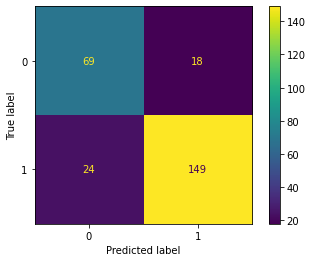

In [43]:
predict_x_test = svm_clf_tuned.predict(X_test)
print(predict_x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_x_test = confusion_matrix(y_test, predict_x_test, labels=svm_clf_tuned.classes_)
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=confusion_x_test, display_labels=svm_clf_tuned.classes_)
disp_tuned.plot()
plt.show()

In [49]:
tn, fp, fn, tp = confusion_x_test.ravel()
print(tn)
print(fp)
print(fn)
print(tp)
print("Accuracy : " + str((tp+tn) / (tn+fp+fn+tp)))
print("Precision : " + str(tp / (tp+fp)))
print("Recall : " + str(tp / (tp+fn)))

69
18
24
149
Accuracy : 0.8384615384615385
Precision : 0.8922155688622755
Recall : 0.861271676300578


### Kfold confusion matrix

[[ 97  18]
 [ 21 152]]
[[ 79  29]
 [ 29 151]]
[[ 91  16]
 [ 28 153]]
[[267  63]
 [ 78 456]]


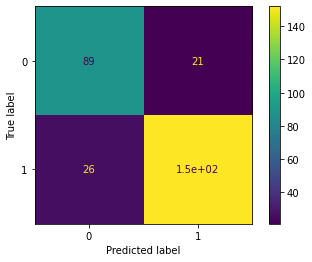

In [39]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)
k_fold_cm = np.array([[0,0],[0,0]])
for train_index, test_index in cv.split(X):
    #print(train_index, test_index)
    #NB_Clf_nonlaplace.fit(train)
    svm_clf_tuned.fit(X.iloc[train_index], y.iloc[train_index])
    predict_temp = svm_clf_tuned.predict(X.iloc[test_index])
    cm_temp = confusion_matrix(y.iloc[test_index], predict_temp, labels=svm_clf_tuned.classes_)
    k_fold_cm += cm_temp
    print(cm_temp)
print(k_fold_cm)
k_fold_cm = k_fold_cm / 3
disp_dt_binary_kfold = ConfusionMatrixDisplay(confusion_matrix=k_fold_cm, display_labels=svm_clf_tuned.classes_)

disp_dt_binary_kfold.plot()
plt.show()

In [50]:
tn, fp, fn, tp = k_fold_cm.ravel()
print(tn)
print(fp)
print(fn)
print(tp)
print("Accuracy : " + str((tp+tn) / (tn+fp+fn+tp)))
print("Precision : " + str(tp / (tp+fp)))
print("Recall : " + str(tp / (tp+fn)))

89.0
21.0
26.0
152.0
Accuracy : 0.8368055555555556
Precision : 0.8786127167630058
Recall : 0.8539325842696629


## XGBoost results

### Holdout confusion matrix

In [73]:
xgb_clf_tuned.fit(X_train, y_train)
print("Accuracy of XGB Classifier : " + str(xgb_clf_tuned.score(X_test, y_test, sample_weight=None)))

Accuracy of XGB Classifier : 0.8346153846153846


[1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1
 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1
 0]


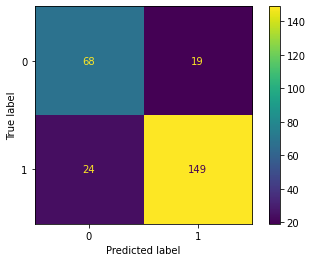

In [74]:
predict_x_test = xgb_clf_tuned.predict(X_test)
print(predict_x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_x_test = confusion_matrix(y_test, predict_x_test, labels=xgb_clf_tuned.classes_)
confusion_display_x_test = ConfusionMatrixDisplay(confusion_matrix=confusion_x_test, display_labels=xgb_clf_tuned.classes_)

confusion_display_x_test.plot()
plt.show()

In [67]:
tn, fp, fn, tp = confusion_x_test.ravel()
print(tn)
print(fp)
print(fn)
print(tp)
print("Accuracy : " + str((tp+tn) / (tn+fp+fn+tp)))
print("Precision : " + str(tp / (tp+fp)))
print("Recall : " + str(tp / (tp+fn)))

68
19
24
149
Accuracy : 0.8346153846153846
Precision : 0.8869047619047619
Recall : 0.861271676300578


### Kfold confusion matrix

[[ 91  24]
 [ 17 156]]
[[ 71  37]
 [ 19 161]]
[[ 85  22]
 [ 22 159]]
[[247  83]
 [ 58 476]]


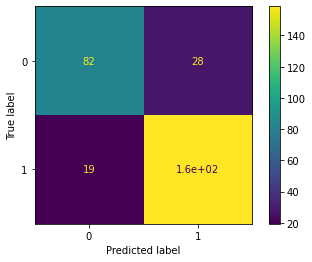

In [37]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)
k_fold_cm = np.array([[0,0],[0,0]])
for train_index, test_index in cv.split(X):
    #print(train_index, test_index)
    #NB_Clf_nonlaplace.fit(train)
    xgb_clf_tuned.fit(X.iloc[train_index], y.iloc[train_index])
    predict_temp = xgb_clf_tuned.predict(X.iloc[test_index])
    cm_temp = confusion_matrix(y.iloc[test_index], predict_temp, labels=xgb_clf_tuned.classes_)
    k_fold_cm += cm_temp
    print(cm_temp)
print(k_fold_cm)
k_fold_cm = k_fold_cm / 3
disp_dt_binary_kfold = ConfusionMatrixDisplay(confusion_matrix=k_fold_cm, display_labels=xgb_clf_tuned.classes_)

disp_dt_binary_kfold.plot()
plt.show()

In [54]:
tn, fp, fn, tp = k_fold_cm.ravel()

print(tn)
print(fp)
print(fn)
print(tp)
print("Accuracy : " + str((tp+tn) / (tn+fp+fn+tp)))
print("Precision : " + str(tp / (tp+fp)))
print("Recall : " + str(tp / (tp+fn)))

89.0
21.0
26.0
152.0
Accuracy : 0.8368055555555556
Precision : 0.8786127167630058
Recall : 0.8539325842696629


## Decision tree results

### Holdout confusion matrix

In [72]:
dt_clf_tuned.fit(X_train, y_train)
print("Accuracy of Decision Tree Classifier : " + str(dt_clf_tuned.score(X_test, y_test, sample_weight=None) ))

Accuracy of Decision Tree Classifier : 0.7807692307692308


[1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1
 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0
 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 1]


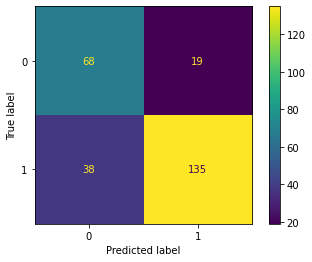

In [75]:
predict_x_test = dt_clf_tuned.predict(X_test)
print(predict_x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_x_test = confusion_matrix(y_test, predict_x_test, labels=dt_clf_tuned.classes_)
confusion_display_x_test = ConfusionMatrixDisplay(confusion_matrix=confusion_x_test, display_labels=dt_clf_tuned.classes_)

confusion_display_x_test.plot()
plt.show()

In [65]:
tn, fp, fn, tp = confusion_x_test.ravel()

print(tn)
print(fp)
print(fn)
print(tp)
print("Accuracy : " + str((tp+tn) / (tn+fp+fn+tp)))
print("Precision : " + str(tp / (tp+fp)))
print("Recall : " + str(tp / (tp+fn)))

68
19
38
135
Accuracy : 0.7807692307692308
Precision : 0.8766233766233766
Recall : 0.7803468208092486


### Kfold confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

[[ 96  19]
 [ 28 145]]
[[ 76  32]
 [ 33 147]]
[[ 80  27]
 [ 30 151]]
[[252  78]
 [ 91 443]]


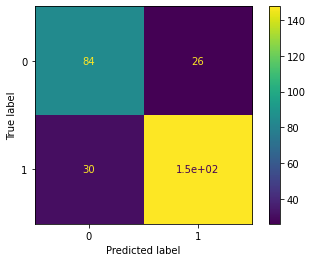

In [35]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)
k_fold_cm = np.array([[0,0],[0,0]])
for train_index, test_index in cv.split(X):
    #print(train_index, test_index)
    #NB_Clf_nonlaplace.fit(train)
    dt_clf_tuned.fit(X.iloc[train_index], y.iloc[train_index])
    predict_temp = dt_clf_tuned.predict(X.iloc[test_index])
    cm_temp = confusion_matrix(y.iloc[test_index], predict_temp, labels=dt_clf_tuned.classes_)
    k_fold_cm += cm_temp
    print(cm_temp)
print(k_fold_cm)
k_fold_cm = k_fold_cm / 3
disp_dt_binary_kfold = ConfusionMatrixDisplay(confusion_matrix=k_fold_cm, display_labels=dt_clf_tuned.classes_)

disp_dt_binary_kfold.plot()
plt.show()

In [55]:
tn, fp, fn, tp = k_fold_cm.ravel()

print(tn)
print(fp)
print(fn)
print(tp)
print("Accuracy : " + str((tp+tn) / (tn+fp+fn+tp)))
print("Precision : " + str(tp / (tp+fp)))
print("Recall : " + str(tp / (tp+fn)))

89.0
21.0
26.0
152.0
Accuracy : 0.8368055555555556
Precision : 0.8786127167630058
Recall : 0.8539325842696629
